# Predicting Winners of Women's Singles Tennis Matches

In this project, I will first review tennis player data from WTA to determine what factors contribute towards winning a singles match in a tennis tournament. I'm using the following data source from Kaggle:  
https://www.kaggle.com/datasets/dissfya/wta-tennis-2007-2023-daily-update

## Outline
I will use the following steps to proceed with analysis.
1. **Import Necessary Libraries and Packages**
2. **Data Loading**: Load the ATP dataset.
3. **Data Cleaning**: Handle missing values and ensure data consistency.
4. **Exploratory Data Analysis (EDA)**: Analyze the data to find patterns and relationships; Use plots to visualize the data and findings.
5. **EDA Summary**: Summarize the findings and insights from the EDA.
6. **Next Steps: Data Transformation**: Preparing dataset for machine learning model.

## Import Necessary Libraries and Packages
First, we will import any necessary dependencies.

In [1]:
# Install dependencies as needed:
%pip install kagglehub[pandas-datasets]

Note: you may need to restart the kernel to use updated packages.


In [1]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

## Data Loading
First we will load the WTA datasets from Kaggle.

In [2]:
# Set the path to the file you'd like to load
file_path = "wta.csv"  # Update this to the correct file name if needed

# Load the latest version
dfwta = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "dissfya/wta-tennis-2007-2023-daily-update",
  # "dissfya/atp-tennis-daily-pull",
  file_path,
  # Provide any additional arguments like 
  # sql_query or pandas_kwargs. See the 
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

C:\Users\sarah\AppData\Local\Temp\ipykernel_28748\4047438785.py:5: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  dfwta = kagglehub.load_dataset(


100%|██████████| 5.46M/5.46M [00:00<00:00, 13.0MB/s]
C:\Users\sarah\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\kagglehub\pandas_datasets.py:91: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  result = read_function(


In [3]:
# Display first 5 records
dfwta.head()

,Tournament,Date,Court,Surface,Round,Best of,Player_1,Player_2,Winner,Rank_1,Rank_2,Pts_1,Pts_2,Odd_1,Odd_2,Score
0,ASB Classic,2007-01-01 00:00:00,Outdoor,Hard,1st Round,3,Sun T.T.,Baker L.,Sun T.T.,81,272,332,90,1.33,3.00,6-1 6-1
1,ASB Classic,2007-01-01 00:00:00,Outdoor,Hard,1st Round,3,Myskina A.,Dulko G.,Dulko G.,16,59,1000,401,1.22,3.75,1-6 7-6 2-6
2,ASB Classic,2007-01-01 00:00:00,Outdoor,Hard,1st Round,3,Loit E.,Birnerova E.,Loit E.,56,84,418,324,1.72,2.00,6-1 6-1
3,ASB Classic,2007-01-01 00:00:00,Outdoor,Hard,1st Round,3,Nakamura A.,Craybas J.,Craybas J.,57,70,405,365,1.83,1.83,5-7 2-6
4,ASB Classic,2007-01-01 00:00:00,Outdoor,Hard,1st Round,3,Bartoli M.,Morita A.,Bartoli M.,18,180,951,152,1.16,4.50,7-6 6-3


## Data Cleaning
Get the number of records, number of columns, and check for missing values.

In [4]:
# get shape of the dataframe
print("Shape of the dataframe:", dfwta.shape)

Shape of the dataframe: (42815, 16)


In [5]:
# check for missing values
missing_values = dfwta.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 Tournament    0
Date          0
Court         0
Surface       0
Round         0
Best of       0
Player_1      0
Player_2      0
Winner        0
Rank_1        0
Rank_2        0
Pts_1         0
Pts_2         0
Odd_1         0
Odd_2         0
Score         0
dtype: int64


In [6]:
# List all Variables in the dataset
dfwta.dtypes

Tournament     object
Date           object
Court          object
Surface        object
Round          object
Best of         int64
Player_1       object
Player_2       object
Winner         object
Rank_1          int64
Rank_2          int64
Pts_1           int64
Pts_2           int64
Odd_1          object
Odd_2         float64
Score          object
dtype: object

## Exploratory Data Analysis
In this step, we will generate descriptive statistics on our dataset.

Number of Unique Tournaments: 237


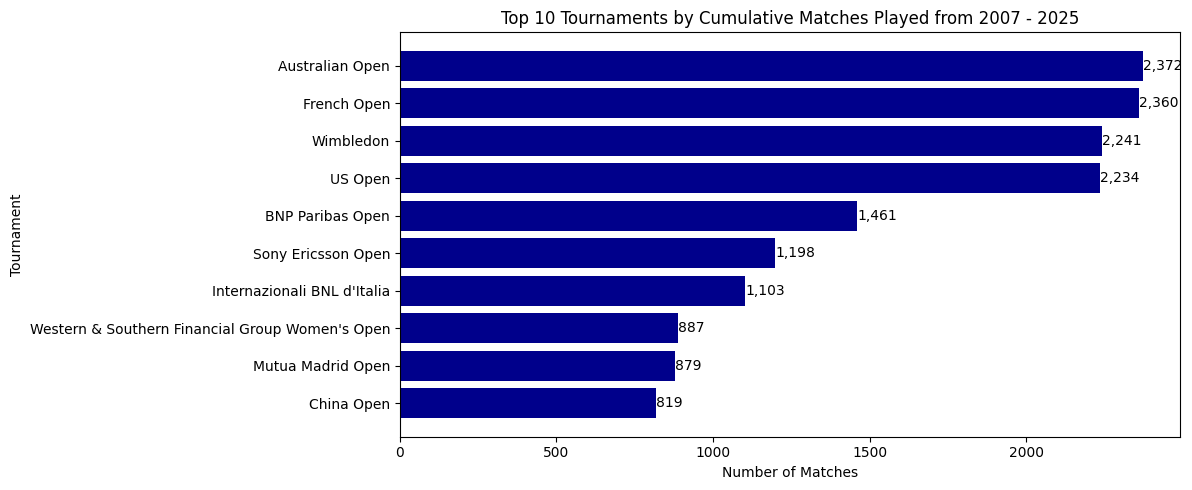

In [8]:
# Display all Unique Tournaments and total number of matches played
print("Number of Unique Tournaments:", dfwta['Tournament'].nunique())

# Create a frequency table of tournaments with key characteristics
tournament_freq = dfwta.groupby(['Tournament'])\
                    .size()\
                    .reset_index(name='Frequency')\
                    .sort_values('Frequency', ascending=False)

# Print frequency table
# print("Tournament Frequency Table: Cumulative Number of Matches Played from 2000 - 2025\n", dfatp['Tournament'].value_counts().head(10))

# Display the top 10 tournaments by frequency in a bar graph
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(12, 5))

# Sort the data in descending order
sorted_data = tournament_freq.sort_values('Frequency', ascending=True).tail(10)  # Using tail() since we're plotting in ascending order

# Create horizontal bars
bars = plt.barh(sorted_data['Tournament'], sorted_data['Frequency'], color='darkblue')

# Add data labels
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2.,
             f'{int(width):,}',
             ha='left', va='center')

plt.ylabel('Tournament')
plt.xlabel('Number of Matches')
plt.title('Top 10 Tournaments by Cumulative Matches Played from 2007 - 2025')
plt.tight_layout()

In [9]:
# List all the rounds in the dataset
rounds = dfwta['Round'].unique()
print("Unique Rounds in the Dataset:", rounds)

Unique Rounds in the Dataset: ['1st Round' '2nd Round' 'Quarterfinals' 'Semifinals' 'The Final'
 '3rd Round' '4th Round' 'Round Robin' 'Third Place']


In [10]:
# List the tournaments that have 'Round Robin' under 'Round'
round_robin_tournaments = dfwta[dfwta['Round'] == 'Round Robin']['Tournament'].unique()
print("Tournaments with 'Round Robin' Round:", round_robin_tournaments)

Tournaments with 'Round Robin' Round: ['Sony Ericsson Championships' 'Commonwealth Bank Tournament of Champions'
 'Qatar Airways Tournament of Champions Sofia'
 'Garanti Koza WTA Tournament of Champions' 'WTA Elite Trophy'
 'BNP Paribas WTA Finals' 'WTA Finals']


Count of Unique Tournaments: 237


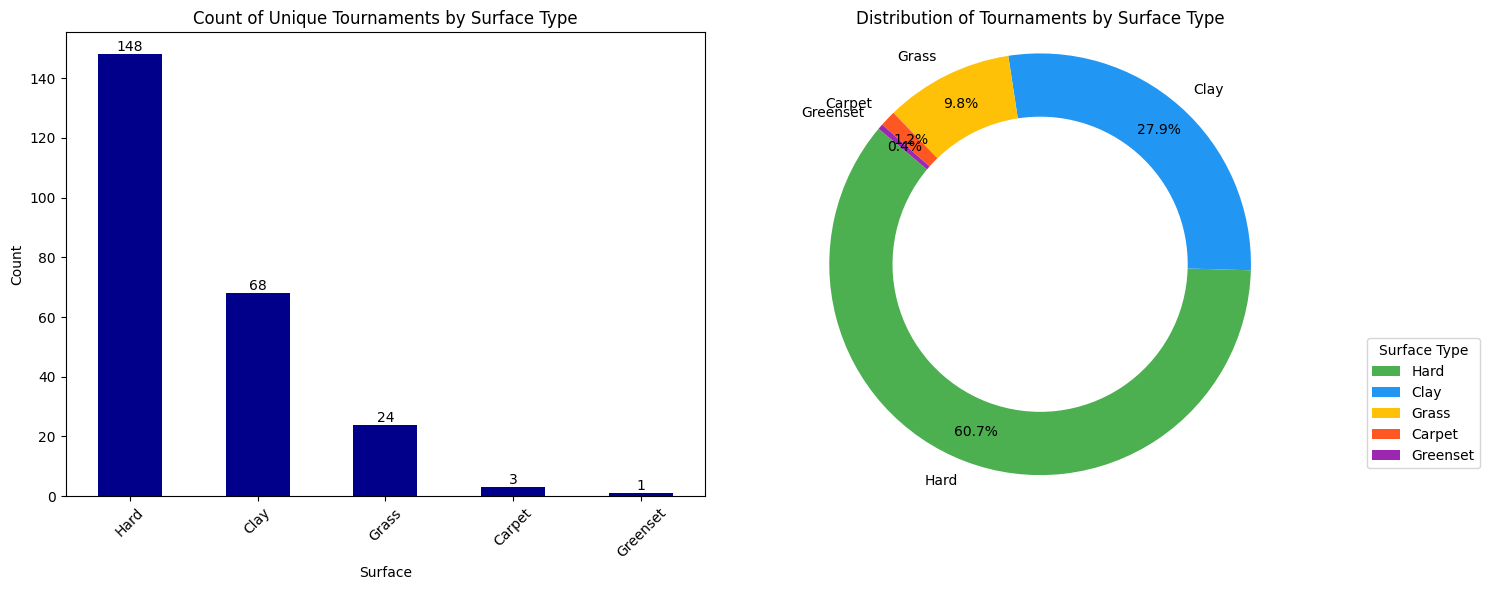

In [13]:
# Display the count of unique Tournaments
print("Count of Unique Tournaments:", dfwta['Tournament'].nunique())

# Count of unique Tournaments by surface in a bar graph with data labels
surface_counts = dfwta.groupby('Surface')['Tournament'].nunique().sort_values(ascending=False)

# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Bar chart on the left
surface_counts.plot(kind='bar', color='darkblue', ax=ax1)
ax1.set_title('Count of Unique Tournaments by Surface Type')
ax1.set_xlabel('Surface')
ax1.set_ylabel('Count')

# Add data labels on bars
for index, value in enumerate(surface_counts):
    ax1.text(index, value, str(value), ha='center', va='bottom')
ax1.tick_params(axis='x', rotation=45)

# Donut chart on the right
ax2.pie(surface_counts, 
    labels=surface_counts.index, 
    autopct='%1.1f%%', 
    pctdistance=0.85,  # Move percentage labels closer to edge
    startangle=140, 
    colors=['#4CAF50', '#2196F3', '#FFC107', '#FF5722', '#9C27B0'],  # Custom colors for each surface type
    wedgeprops=dict(width=0.3))
ax2.set_title('Distribution of Tournaments by Surface Type')
ax2.axis('equal')
ax2.legend(title='Surface Type', loc='center left', bbox_to_anchor=(1, 0.2))

plt.tight_layout()

Top Players with Most Matches Played:
               Player  Matches Played
0       Wozniacki C.             828
1        Azarenka V.             742
2         Kvitova P.             733
3          Kerber A.             711
4       Radwanska A.             708
5  Pavlyuchenkova A.             707
6          Cornet A.             696
7          Errani S.             654
8          Stosur S.             644
9        Jankovic J.             634


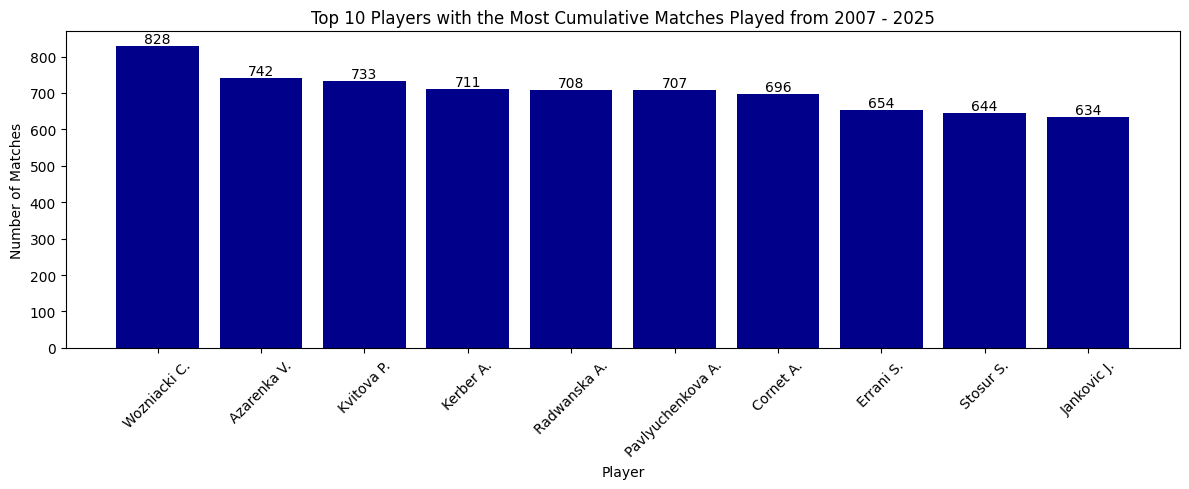

In [14]:
# Display Players (player 1 and player 2) with the most matches played
import pandas as pd

top_players = pd.concat([
	dfwta['Player_1'].value_counts(),
	dfwta['Player_2'].value_counts()
]).groupby(level=0).sum().sort_values(ascending=False).head(10).reset_index()
top_players.columns = ['Player', 'Matches Played']
print("Top Players with Most Matches Played:\n", top_players)

# Set the figure size
plt.figure(figsize=(12, 5))

# Create a bar graph for top players who played the most matches
bars = plt.bar(top_players['Player'], top_players['Matches Played'], color='darkblue')

# Add data labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height):,}',
             ha='center', va='bottom')

plt.xlabel('Player')
plt.ylabel('Number of Matches')
plt.title('Top 10 Players with the Most Cumulative Matches Played from 2007 - 2025')
plt.xticks(rotation=45)
plt.tight_layout()

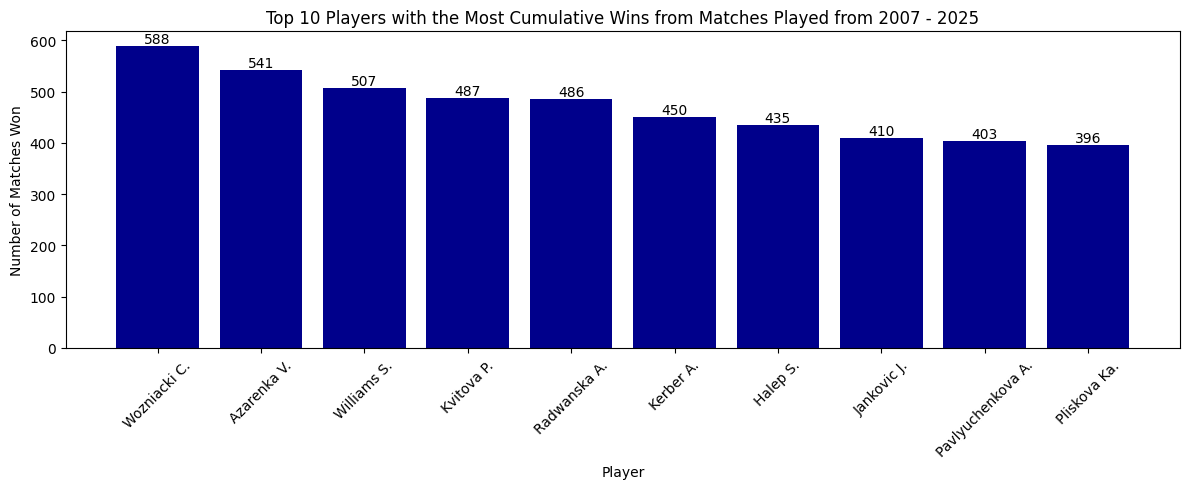

In [15]:
# Display Top 10 Players with the most wins
top_winners = dfwta['Winner'].value_counts().head(10).reset_index()
top_winners.columns = ['Player', 'Wins']

# Set the figure size
plt.figure(figsize=(12, 5))

# Create a bar graph for top players with the most wins
bars = plt.bar(top_winners['Player'], top_winners['Wins'], color='darkblue')

# Add data labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height):,}',
             ha='center', va='bottom')

plt.xlabel('Player')
plt.ylabel('Number of Matches Won')
plt.title('Top 10 Players with the Most Cumulative Wins from Matches Played from 2007 - 2025')
plt.xticks(rotation=45)
plt.tight_layout()

## EDA Summary
Based on this dataset, over 42,500 matches were played across 237 unique Tournaments between 2007 and 2025, with the greatest number of matches played at the 4 major Grand Slams: Australian Open, French Open, Wimbledon, US Open. Over half of the tournaments are played on hard surfaces. Among the top 5 players with the greatest number of winning matches are: Wozniacki, Azarenka, Williams S., Kvitova, and Radwanska. Records of retired players will be filtered out prior to building the model to predict the winners of singles matches played in the tournaments.

## Next Steps: Data Transformation
In my next step, I will transform the dataset in preparation for modeling. I plan on including the following tournament-related attributes: [Tournament], [Date], [Series], [Court], [Surface], [Pts_1], [Pts_2], [Odd_1], [Odd_2]. Additionally, it is important to exclude players who have already retired, which can be done by referencing https://www.itia.tennis/anti-doping/retired-players-list/.